In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import pandas as pd

Preparación

1.

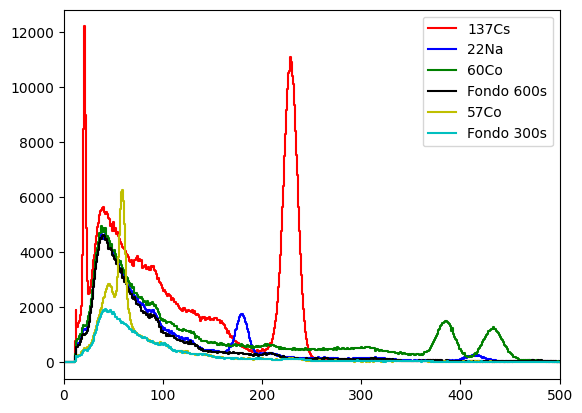

In [ ]:
df_137Cs = pd.read_excel('NaI_137Cs_600s.xlsx')
df_22Na = pd.read_excel('NaI_22Na_600s.xlsx')
df_60Co = pd.read_excel('NaI_60Co_600s.xlsx')
df_Fondo600 = pd.read_excel('NaI_Fondo_600s.xlsx')

df_57Co_300 = pd.read_excel('NaI_57Co_300s.xlsx')
df_Fondo300 = pd.read_excel('NaI_Fondo_300s.xlsx')

fig, ax = plt.subplots()

ax.set_xlim(0,500)
ax.plot(df_137Cs['canal'], df_137Cs['cuentas'], 'r', label='137Cs', ds ='steps-post')
ax.plot(df_22Na['canal'], df_22Na['cuentas'], 'b', label='22Na', ds ='steps-post')
ax.plot(df_60Co['canal'], df_60Co['cuentas'], 'g', label='60Co', ds ='steps-post')
ax.plot(df_Fondo600['canal'], df_Fondo600['cuentas'], 'k', label='Fondo 600s', ds ='steps-post')

ax.plot(df_57Co_300['canal'], df_57Co_300['cuentas'], 'y', label='57Co', ds ='steps-post')
ax.plot(df_Fondo300['canal'], df_Fondo300['cuentas'], 'c', label='Fondo 300s', ds ='steps-post')
ax.legend()

2.

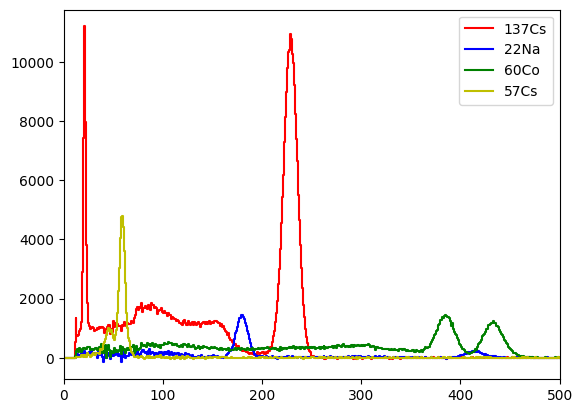

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(0,500)
ax.plot(df_137Cs['canal'], df_137Cs['cuentas'] - df_Fondo600['cuentas'], 'r', label='137Cs', ds ='steps-post')
ax.plot(df_22Na['canal'], df_22Na['cuentas'] - df_Fondo600['cuentas'], 'b', label='22Na', ds ='steps-post')
ax.plot(df_60Co['canal'], df_60Co['cuentas'] - df_Fondo600['cuentas'], 'g', label='60Co', ds ='steps-post')


ax.plot(df_57Co_300['canal'], df_57Co_300['cuentas'] - df_Fondo300['cuentas'], 'y', label='57Cs', ds ='steps-post')
ax.legend()

3.

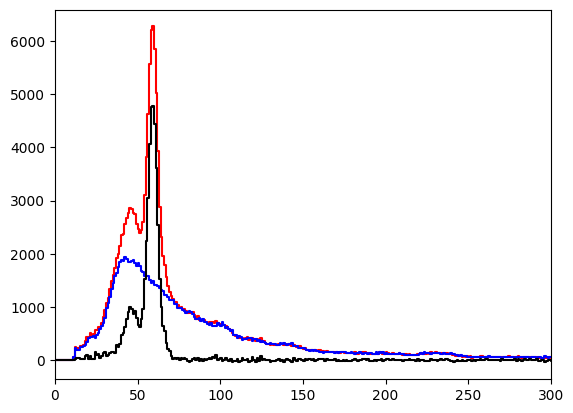

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(0,300)
ax.plot(df_57Co_300['canal'], df_57Co_300['cuentas'], 'r', label='57Co', ds ='steps-post')
ax.plot(df_Fondo300['canal'], df_Fondo300['cuentas'], 'b', label='Fondo 300s', ds ='steps-post')
ax.plot(df_57Co_300['canal'], df_57Co_300['cuentas'] - df_Fondo300['cuentas'], 'k', label='57Cs', ds ='steps-post')

Análisis

In [ ]:
def fondo(b0, b1, mu, x):
  return b0 + (b1*(mu - x))

In [ ]:
def gauss(x, M, mu, sigma):
  return M * np.exp(- (1/2) * np.square((mu - x) / (sigma)))

In [ ]:
def fx(x, b0, b1, M, mu, sigma):
  return b0 + (b1*(mu - x)) + M * np.exp(- (1/2) * np.square((mu - x) / (sigma)))

In [ ]:
def fit(fun, x, y, initial_guess):
  res, cov = curve_fit(fun, x, y, p0=initial_guess)
  return res, cov

In [ ]:
def lineal(canal, b0, b1):
  return b0 + (b1*canal)

137Cs

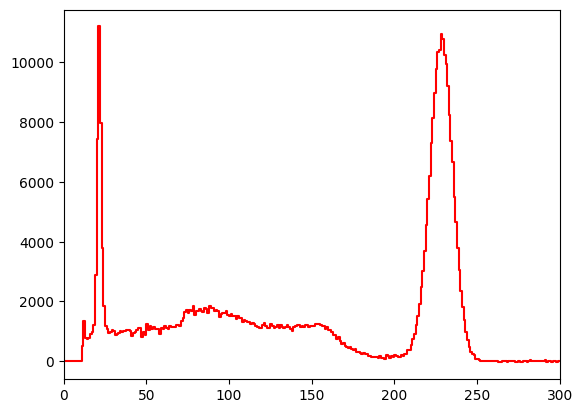

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(0,300)
ax.plot(df_137Cs['canal'], df_137Cs['cuentas'] - df_Fondo600['cuentas'], 'r', label='137Cs', ds ='steps-post')

Pico 1. (32.8 keV)

983.8716647124965 -18.109271768629604 10010.928036514992 21.075701319182283 1.1656263644859375


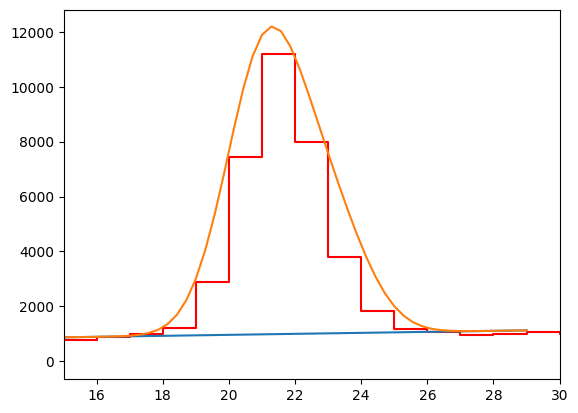

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(15,30)
ax.plot(df_137Cs['canal'], df_137Cs['cuentas'] - df_Fondo600['cuentas'], 'r', label='137Cs', ds ='steps-post')

x_137Cs1 = np.array(df_137Cs['canal'][15:30])
y_137Cs1 = np.array(df_137Cs['cuentas'][15:30]- df_Fondo600['cuentas'][15:30])
initial_guess_137Cs = [np.min(y_137Cs1), (y_137Cs1[-1] - y_137Cs1[0]) / (x_137Cs1[-1] - x_137Cs1[0]), np.max(y_137Cs1)-np.min(y_137Cs1), np.mean(x_137Cs1), np.std(x_137Cs1)]

params_137Cs1, cov_137Cs1= fit(fx, x_137Cs1, y_137Cs1, initial_guess_137Cs)

ax.plot(np.linspace(np.min(x_137Cs1), np.max(x_137Cs1)), fondo(params_137Cs1[0], params_137Cs1[1], params_137Cs1[-2], np.linspace(np.min(x_137Cs1), np.max(x_137Cs1))))
ax.plot(np.linspace(np.min(x_137Cs1), np.max(x_137Cs1)), fx(np.linspace(np.min(x_137Cs1), np.max(x_137Cs1)), *params_137Cs1) + gauss(np.linspace(np.min(x_137Cs1), np.max(x_137Cs1)), 4000, 23, params_137Cs1[-1]))
# ax.plot(np.linspace(np.min(x_137Cs1), np.max(x_137Cs1)), gauss(np.linspace(np.min(x_137Cs1), np.max(x_137Cs1)), 3000, 23, params_137Cs1[-1]) + fondo(params_137Cs1[0], params_137Cs1[1], params_137Cs1[-2], np.linspace(np.min(x_137Cs1), np.max(x_137Cs1))))

print(*params_137Cs1)

Pico 2. (661.7 keV)

107.69198781976783 5.496536093152347 10669.842705534118 228.12007725231322 6.8313613463161


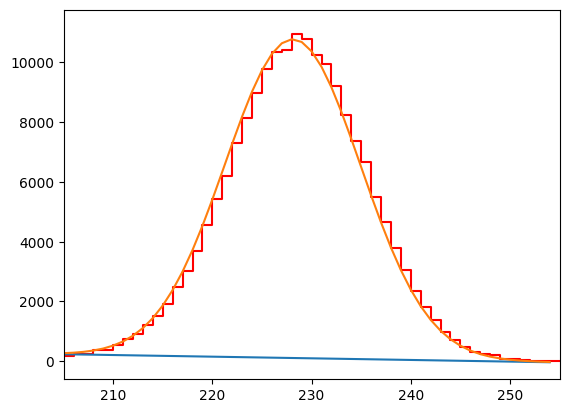

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(205,255)
ax.plot(df_137Cs['canal'], df_137Cs['cuentas'] - df_Fondo600['cuentas'], 'r', label='137Cs', ds ='steps-post')

x_137Cs2 = np.array(df_137Cs['canal'][205:255])
y_137Cs2 = np.array(df_137Cs['cuentas'][205:255]- df_Fondo600['cuentas'][205:255])
initial_guess_137Cs2 = [np.min(y_137Cs2), (y_137Cs2[-1] - y_137Cs2[0]) / (x_137Cs2[-1] - x_137Cs2[0]), np.max(y_137Cs2)-np.min(y_137Cs2), np.mean(x_137Cs2), np.std(x_137Cs2)]

params_137Cs2, cov_137Cs2= fit(fx, x_137Cs2, y_137Cs2, initial_guess_137Cs2)

ax.plot(np.linspace(np.min(x_137Cs2), np.max(x_137Cs2)), fondo(params_137Cs2[0], params_137Cs2[1], params_137Cs2[-2], np.linspace(np.min(x_137Cs2), np.max(x_137Cs2))))
ax.plot(np.linspace(np.min(x_137Cs2), np.max(x_137Cs2)), fx(np.linspace(np.min(x_137Cs2), np.max(x_137Cs2)), *params_137Cs2))
# ax.plot(np.linspace(np.min(x_137Cs2), np.max(x_137Cs2)), gauss(np.linspace(np.min(x_137Cs1), np.max(x_137Cs1)), 3000, 23, params_137Cs1[-1]) + fondo(params_137Cs1[0], params_137Cs1[1], params_137Cs1[-2], np.linspace(np.min(x_137Cs1), np.max(x_137Cs1))))

print(*params_137Cs2)

22Na

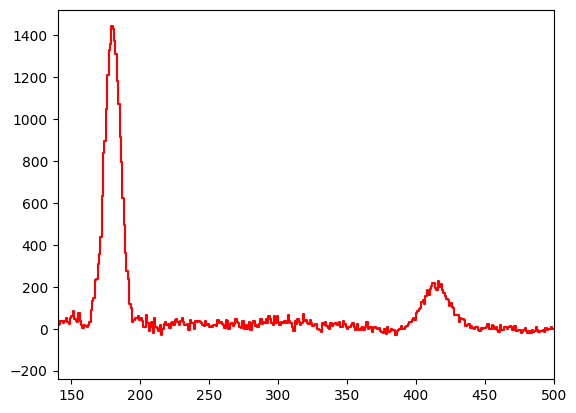

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(140,500)
ax.plot(df_22Na['canal'], df_22Na['cuentas'] - df_Fondo600['cuentas'], 'r', label='22Na', ds ='steps-post')

Pico 1. (511 keV)

25.342516303256343 0.27613075283520255 1409.6100522871752 179.48129209354875 5.754766957686028


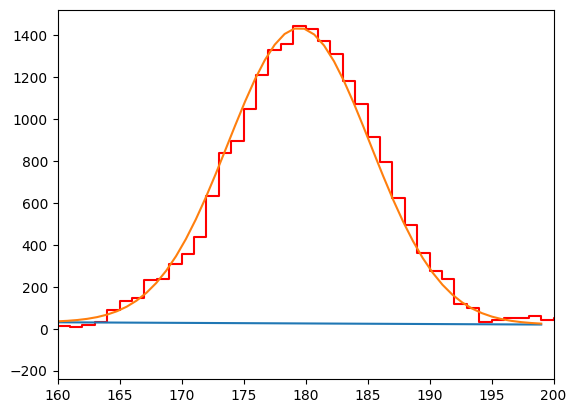

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(160,200)
ax.plot(df_22Na['canal'], df_22Na['cuentas'] - df_Fondo600['cuentas'], 'r', label='22Na', ds ='steps-post')

x_22Na = np.array(df_22Na['canal'][160:200])
y_22Na = np.array(df_22Na['cuentas'][160:200]- df_Fondo600['cuentas'][160:200])
initial_guess_22Na = [np.min(y_22Na), (y_22Na[-1] - y_22Na[0]) / (x_22Na[-1] - x_22Na[0]), np.max(y_22Na)-np.min(y_22Na), np.mean(x_22Na), np.std(x_22Na)]

params_22Na, cov_22Na= fit(fx, x_22Na, y_22Na, initial_guess_22Na)

ax.plot(np.linspace(np.min(x_22Na), np.max(x_22Na)), fondo(params_22Na[0], params_22Na[1], params_22Na[-2], np.linspace(np.min(x_22Na), np.max(x_22Na))))
ax.plot(np.linspace(np.min(x_22Na), np.max(x_22Na)), fx(np.linspace(np.min(x_22Na), np.max(x_22Na)), *params_22Na))

print(*params_22Na)

Pico 2. (1274.5 keV)

-4.710194947806602 -0.21558118624539707 211.9860073049541 414.15357652612636 9.953146038254785


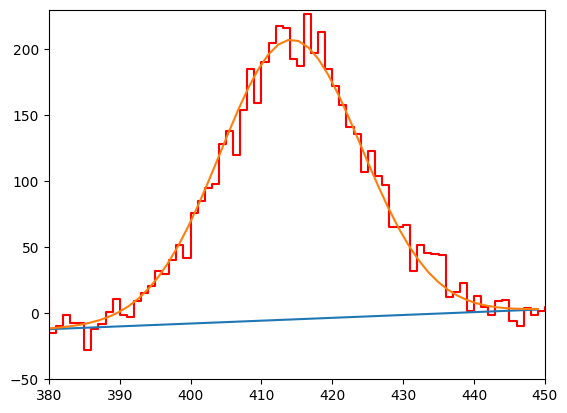

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(380,450)
ax.set_ylim(-50,230)
ax.plot(df_22Na['canal'], df_22Na['cuentas'] - df_Fondo600['cuentas'], 'r', label='22Na', ds ='steps-post')

x_22Na2 = np.array(df_22Na['canal'][380:450])
y_22Na2 = np.array(df_22Na['cuentas'][380:450]- df_Fondo600['cuentas'][380:450])
initial_guess_22Na2 = [np.min(y_22Na2), (y_22Na2[-1] - y_22Na2[0]) / (x_22Na2[-1] - x_22Na2[0]), np.max(y_22Na2)-np.min(y_22Na2), np.mean(x_22Na2), np.std(x_22Na2)]

params_22Na2, cov_22Na2= fit(fx, x_22Na2, y_22Na2, initial_guess_22Na2)

ax.plot(np.linspace(np.min(x_22Na2), np.max(x_22Na2)), fondo(params_22Na2[0], params_22Na2[1], params_22Na2[-2], np.linspace(np.min(x_22Na2), np.max(x_22Na2))))
ax.plot(np.linspace(np.min(x_22Na2), np.max(x_22Na2)), fx(np.linspace(np.min(x_22Na2), np.max(x_22Na2)), *params_22Na2))

print(*params_22Na2)

60Co

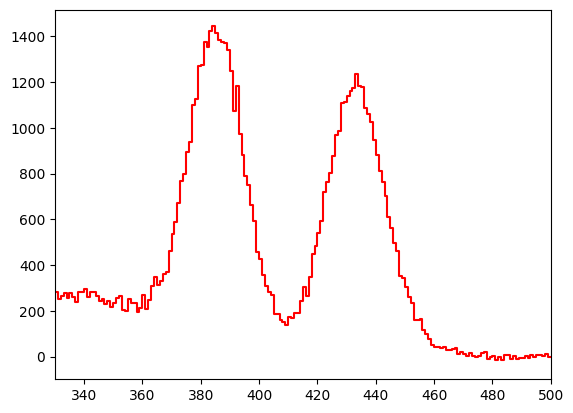

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(330,500)
ax.plot(df_60Co['canal'], df_60Co['cuentas'] - df_Fondo600['cuentas'], 'r', label='60Co', ds='steps-post')

Pico 1. (1173.2 keV)

148.55265226758453 2.3801680960186595 1292.2162344071705 384.7939594420932 9.085925250707309


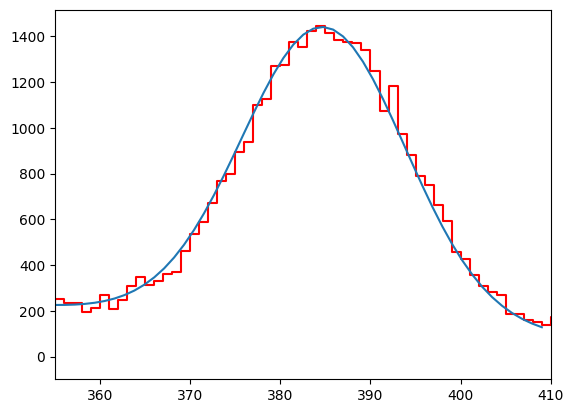

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(355,410)
ax.plot(df_60Co['canal'], df_60Co['cuentas'] - df_Fondo600['cuentas'], 'r', label='60Co', ds ='steps-post')

x_60Co = np.array(df_60Co['canal'][355:410])
y_60Co = np.array(df_60Co['cuentas'][355:410]- df_Fondo600['cuentas'][355:410])
initial_guess_60Co = [np.min(y_60Co), (y_60Co[-1] - y_60Co[0]) / (x_60Co[-1] - x_60Co[0]), np.max(y_60Co)-np.min(y_60Co), np.mean(x_60Co), np.std(x_60Co)]

params_60Co, cov_60Co= fit(fx, x_60Co, y_60Co, initial_guess_60Co)

ax.plot(np.linspace(np.min(x_60Co), np.max(x_60Co)), fx(np.linspace(np.min(x_60Co), np.max(x_60Co)), *params_60Co))

print(*params_60Co)

Pico 2. (1332.5 keV)

51.763213138021776 0.47934514546595774 1132.0486994178377 432.66382728471746 9.791087490503472


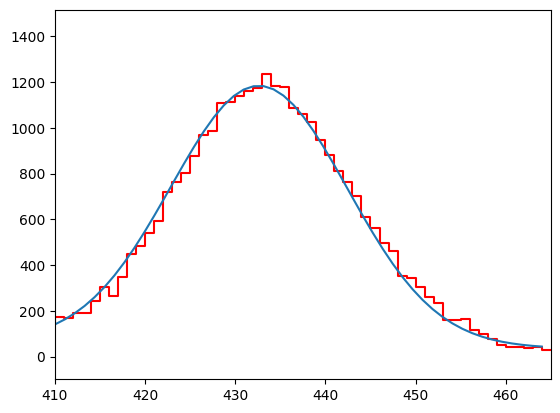

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(410,465)
ax.plot(df_60Co['canal'], df_60Co['cuentas'] - df_Fondo600['cuentas'], 'r', label='60Co', ds ='steps-post')

x_60Co2 = np.array(df_60Co['canal'][410:465])
y_60Co2 = np.array(df_60Co['cuentas'][410:465]- df_Fondo600['cuentas'][410:465])
initial_guess_60Co2 = [np.min(y_60Co2), (y_60Co2[-1] - y_60Co2[0]) / (x_60Co2[-1] - x_60Co2[0]), np.max(y_60Co2)-np.min(y_60Co2), np.mean(x_60Co2), np.std(x_60Co2)]

params_60Co2, cov_60Co2= fit(fx, x_60Co2, y_60Co2, initial_guess_60Co2)

ax.plot(np.linspace(np.min(x_60Co2), np.max(x_60Co2)), fx(np.linspace(np.min(x_60Co2), np.max(x_60Co2)), *params_60Co2))

print(*params_60Co2)

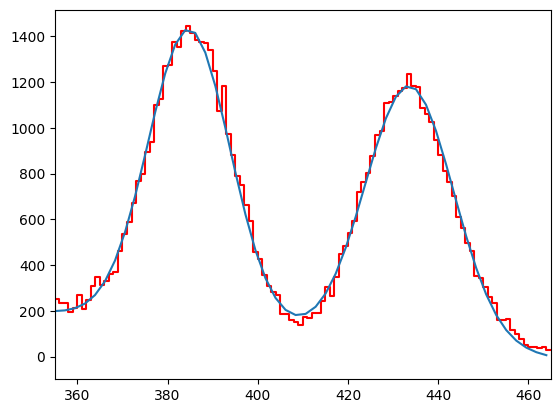

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(355,465)
ax.plot(df_60Co['canal'], df_60Co['cuentas'] - df_Fondo600['cuentas'], 'r', label='60Co', ds ='steps-post')

x_60Co_Fondo = np.array(df_60Co['canal'][355:465])
y_60Co_Fondo = np.array(df_60Co['cuentas'][355:465])

# ax.plot(np.linspace(np.min(x_60Co), np.max(x_60Co)), gauss(np.linspace(np.min(x_60Co), np.max(x_60Co)), 1292, 385, 9))
# ax.plot(np.linspace(np.min(x_60Co2), np.max(x_60Co2)), gauss(np.linspace(np.min(x_60Co2), np.max(x_60Co2)), 1132, 433, 9))


# ax.plot(np.linspace(np.min(x_60Co), np.max(x_60Co2)),  fondo(240, 1.8, 351, np.linspace(np.min(x_60Co), np.max(x_60Co2))))
ax.plot(np.linspace(np.min(x_60Co), np.max(x_60Co2)),  gauss(np.linspace(np.min(x_60Co), np.max(x_60Co2)), 1292.2162344071705, 384.7939594420932, 9.085925250707309) + gauss(np.linspace(np.min(x_60Co), np.max(x_60Co2)), 1132.0486994178377, 433.66382728471746, 9.791087490503472) + fondo(200, 1.8, 351, np.linspace(np.min(x_60Co), np.max(x_60Co2))))
# ax.plot(np.linspace(np.min(x_60Co), np.max(x_60Co2)), fx(np.linspace(np.min(x_60Co), np.max(x_60Co2)), *params_60Co) + fx(np.linspace(np.min(x_60Co), np.max(x_60Co2)), *params_60Co2), 'k')


57Co

195.26923648006164 -5.233251189121058 784.5338226232482 45.85052117508079 3.9221517181023935
403.5054708201677 24.167102962838815 4465.1035399535285 58.78095718661487 2.7219649270339885


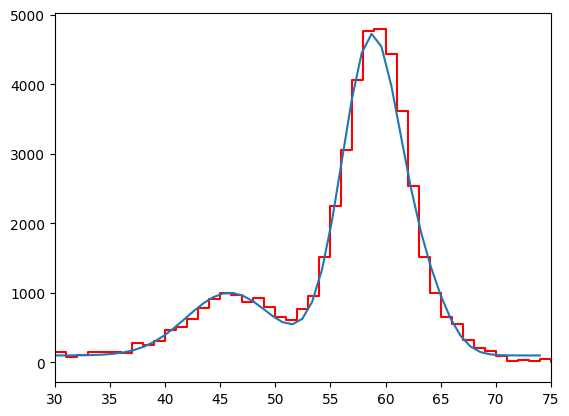

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(30,75)

ax.plot(df_57Co_300['canal'], df_57Co_300['cuentas'] - df_Fondo300['cuentas'], 'r', label='57Co', ds='steps-post')

#122.1 keV

x_57Co = np.array(df_57Co_300['canal'][30:51])
y_57Co = np.array(df_57Co_300['cuentas'][30:51] - df_Fondo300['cuentas'][30:51])
initial_guess_57Co = [35, (600 - 140) / (51 - 35), 860, 45, 3]

params_57Co, cov_57Co = fit(fx, x_57Co, y_57Co, initial_guess_57Co)

# ax.plot(np.linspace(np.min(x_57Co), np.max(x_57Co)), fx(np.linspace(np.min(x_57Co), np.max(x_57Co)), *params_57Co))

#-----------------------------------------------------------------------------------------------------------------------------------
#136.5 keV

x_57Co2 = np.array(df_57Co_300['canal'][51:76])
y_57Co2 = np.array(df_57Co_300['cuentas'][51:76] - df_Fondo300['cuentas'][51:76])
initial_guess_57Co2 = [600, (0 - 600) / (71 - 51), 4200, 59, 3]

params_57Co2, cov_57Co2 = fit(fx, x_57Co2, y_57Co2, initial_guess_57Co2)

# ax.plot(np.linspace(np.min(x_57Co2), np.max(x_57Co2)), fx(np.linspace(np.min(x_57Co2), np.max(x_57Co2)), *params_57Co2))

#-----------------------------------------------------------------------------------------------------------------------------------

x_57Co3 = np.array(df_57Co_300['canal'][30:75])
y_57Co3 = np.array(df_57Co_300['cuentas'][30:75] - df_Fondo300['cuentas'][30:75])

# ax.plot(np.linspace(np.min(x_57Co3), np.max(x_57Co3)), fx(np.linspace(np.min(x_57Co3), np.max(x_57Co3)), 0, 0, 600, 64, 2.5))

#-----------------------------------------------------------------------------------------------------------------------------------

ax.plot(np.linspace(np.min(x_57Co), np.max(x_57Co3)), fx(np.linspace(np.min(x_57Co), np.max(x_57Co3)), 100, 0, 900, params_57Co[3], params_57Co[4]) + fx(np.linspace(np.min(x_57Co), np.max(x_57Co3)), 0, 0, 4600, params_57Co2[3], params_57Co2[4]) + fx(np.linspace(np.min(x_57Co), np.max(x_57Co3)), 0, 0, 600, 64, 2))

print(*params_57Co)
print(*params_57Co2)

2.

a), b), c)

a_0 = -41.13694749092444
sigma a_0 = 8.101086799344166
a_1 = 3.1578744968254466
sigma a_1 = 0.029654186365424433


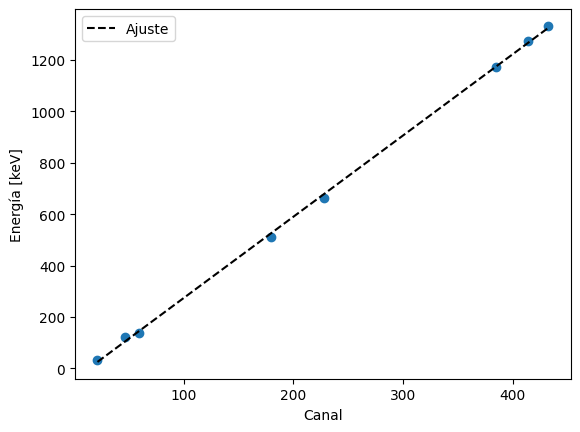

In [ ]:
Canal = np.array([params_137Cs1[-2], params_57Co[-2], params_57Co2[-2], params_22Na[-2], params_137Cs2[-2], params_60Co[-2], params_22Na2[-2], params_60Co2[-2]])
E = np.array([32.8, 122.1, 136.5, 511.0, 661.7, 1173.2, 1274.5, 1332.5])

res_E, cov_E = fit(lineal, Canal, E, [0, (E[-1] - E[0]) / (Canal[-1] - Canal[0])])

fig, ax = plt.subplots()

ax.set_xlabel(f'Canal')
ax.set_ylabel(f'Energía [keV]')
ax.scatter(Canal, E)
ax.plot(Canal, lineal(Canal, *res_E), '--k', label='Ajuste')
ax.legend()

print(f'a_0 = {res_E[0]}')
print(f'sigma a_0 = {np.sqrt(cov_E[0][0])}')
print(f'a_1 = {res_E[1]}')
print(f'sigma a_1 = {np.sqrt(cov_E[1][1])}')

3.

In [ ]:
print(f'E = {E}')

E_gamma = lineal(Canal, *res_E)
print(f'E_γ = {E_gamma}')

delta_E = np.abs(E - E_gamma)
print(f'ΔE = {delta_E}')

porcentaje = (delta_E / E) * 100
print(f'% = {porcentaje}')

sigmas = np.array([params_137Cs1[-1], params_57Co[-1], params_57Co2[-1], params_22Na[-1], params_137Cs2[-1], params_60Co[-1], params_22Na2[-1], params_60Co2[-1]])
FWHM = np.array(2 * np.sqrt(2*np.log(2)) * sigmas)
print(f'FWHM = {FWHM}')

E = [  32.8  122.1  136.5  511.   661.7 1173.2 1274.5 1332.5]
E_γ = [  25.41747221  103.65324399  144.48593811  525.64244747  679.23762668
 1173.99408356 1266.70806959 1325.16111839]
ΔE = [ 7.38252779 18.44675601  7.98593811 14.64244747 17.53762668  0.79408356
  7.79193041  7.33888161]
% = [22.50770668 15.10790828  5.85050411  2.8654496   2.6503894   0.06768527
  0.61137155  0.55076035]
FWHM = [ 2.74484033  9.23596149  6.40973757 13.55144059 16.08662663 21.39571891
 23.4378678  23.05624909]


4.

a).

In [ ]:
def FW(E, c0, c1):
  return c0 + (c1 * np.sqrt(E))

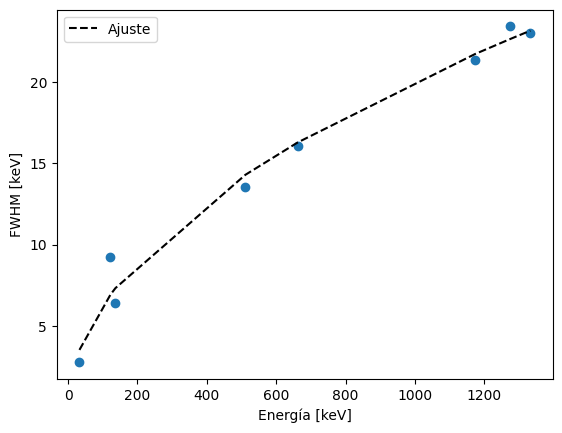

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel(f'Energía [keV]')
ax.set_ylabel(f'FWHM [keV]')

ax.scatter(E, FWHM)

res_FWHM, cov_FWHM = curve_fit(FW, E, FWHM, [0, (FWHM[-1] - FWHM[0]) / np.sqrt(E[-1] - E[0])])

ax.plot(E, FW(E, *res_FWHM), '--k', label='Ajuste')
ax.legend()

5.

[1.10030512e+02 2.09945458e-01 4.64457634e+03 1.44079442e+02
 9.54042563e+00]


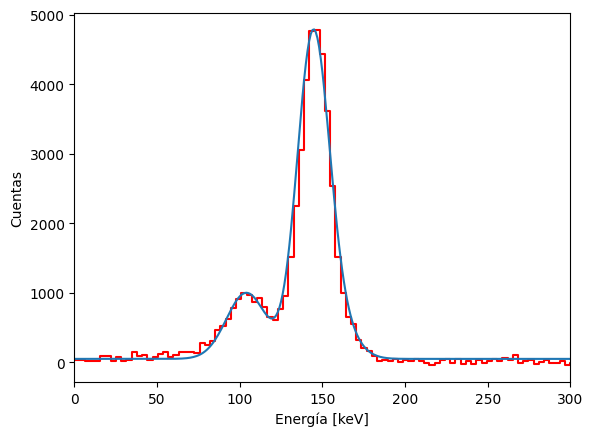

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(0,300)
ax.set_xlabel(f'Energía [keV]')
ax.set_ylabel(f'Cuentas')

ax.plot(lineal(df_57Co_300['canal'], *res_E), df_57Co_300['cuentas'] - df_Fondo300['cuentas'], 'r', label='57Co', ds='steps-post')

#122.1 keV

xx_57Co = np.array(lineal(df_57Co_300['canal'], *res_E)[0:300])
yy_57Co = np.array(df_57Co_300['cuentas'][0:300] - df_Fondo300['cuentas'][0:300])
initial_guess_57Co = [0, (650 - 90) / (185 - 122), 910, 105, 15]

pparams_57Co, ccov_57Co = fit(fx, xx_57Co, yy_57Co, initial_guess_57Co)
print(pparams_57Co)
ax.plot(df_57Co_300['canal'], fx(df_57Co_300['canal'], 0, 0, 950, 104, 12) + fx(df_57Co_300['canal'], 50, 0, 4300, 144, pparams_57Co[4]) + fx(df_57Co_300['canal'], 0, 0, 650, 155, 12))

#-----------------------------------------------------------------------------------------------------------------------------------
#136.5 keV

xx_57Co2 = np.array(lineal(df_57Co_300['canal'], *res_E)[50:123])
yy_57Co2 = np.array(df_57Co_300['cuentas'][50:123] - df_Fondo300['cuentas'][50:123])
initial_guess_57Co2 = [90, (650 - 90) / (185 - 122), 910, 105, 100]

pparams_57Co2, ccov_57Co2 = fit(fx, xx_57Co2, yy_57Co2, initial_guess_57Co2)

# ax.plot(np.linspace(np.min(xx_57Co2), np.max(xx_57Co2)), fx(np.linspace(np.min(xx_57Co2), np.max(xx_57Co2)), *pparams_57Co2))

#-----------------------------------------------------------------------------------------------------------------------------------

x_57Co3 = np.array(df_57Co_300['canal'][30:75])
y_57Co3 = np.array(df_57Co_300['cuentas'][30:75] - df_Fondo300['cuentas'][30:75])

# ax.plot(np.linspace(np.min(x_57Co3), np.max(x_57Co3)), fx(np.linspace(np.min(x_57Co3), np.max(x_57Co3)), 0, 0, 600, 64, 2.5))

#-----------------------------------------------------------------------------------------------------------------------------------

# ax.plot(np.linspace(np.min(x_57Co), np.max(x_57Co3)), fx(np.linspace(np.min(x_57Co), np.max(x_57Co3)), 100, 0, 900, params_57Co[3], params_57Co[4]) + fx(np.linspace(np.min(x_57Co), np.max(x_57Co3)), 0, 0, 4600, params_57Co2[3], params_57Co2[4]) + fx(np.linspace(np.min(x_57Co), np.max(x_57Co3)), 0, 0, 600, 64, 2))
# ax.plot([185,185], [0,5000])
# ax.plot([0,300], [90,90])
# ax.plot([0,300], [650,650])

6.

In [ ]:
#Intensidades

#122.1 keV
I_57Co = np.sqrt(2*np.pi)*900*params_57Co[4]
sigma_I_57Co = I_57Co * np.sqrt((np.sqrt(900)/900)**2 + (np.sqrt(params_57Co[4])/params_57Co[4])**2)

#136.5 keV
I_57Co2 = np.sqrt(2*np.pi)*4600*params_57Co2[4]
sigma_I_57Co2 = I_57Co2 * np.sqrt((np.sqrt(4600)/4600)**2 + (np.sqrt(params_57Co2[4])/params_57Co2[4])**2)

#661.7 keV
I_137Cs2 = np.sqrt(2*np.pi)*params_137Cs2[2]*params_137Cs2[4]
sigma_I_137Cs2 = I_137Cs2 * np.sqrt((np.sqrt(params_137Cs2[2])/params_137Cs2[2])**2 + (np.sqrt(params_137Cs2[4])/params_137Cs2[4])**2)

#1173.2 keV
I_60Co = np.sqrt(2*np.pi)*params_60Co[2]*params_60Co[4]
sigma_I_60Co = I_60Co * np.sqrt((np.sqrt(params_60Co[2])/params_60Co[2])**2 + (np.sqrt(params_60Co[4])/params_60Co[4])**2)

#1274.5 keV
I_22Na2 = np.sqrt(2*np.pi)*params_22Na2[2]*params_22Na2[4]
sigma_I_22Na2 = I_22Na2 * np.sqrt((np.sqrt(params_22Na2[2])/params_22Na2[2])**2 + (np.sqrt(params_22Na2[4])/params_22Na2[4])**2)

#1332.5 keV
I_60Co2 = np.sqrt(2*np.pi)*params_60Co2[2]*params_60Co2[4]
sigma_I_60Co2 = I_60Co2 * np.sqrt((np.sqrt(params_60Co2[2])/params_60Co2[2])**2 + (np.sqrt(params_60Co2[4])/params_60Co2[4])**2)

print(f'I_122.1 = {I_57Co}')
print(f'I_136.5 = {I_57Co2}')
print(f'I_661.7 = {I_137Cs2}')
print(f'I_1173.2 = {I_60Co}')
print(f'I_1274.5 = {I_22Na2}')
print(f'I_1332.5 = {I_60Co2}')
print()
#Actividades

Ao = np.array([40.7, 40.7, 35.1, 34.8, 31.9, 34.8])
delta_t = np.array([4380, 4380, 4309, 4288, 4260, 4288]) #en días
# delta_t = np.array([12, 12, 11.80548, 11.74795, 11.67123, 11.74795]) #en años
T = np.array([271.79, 271.79, 10975.55, 1924.061, 949.6935, 1924.061])
tau = T/np.log(2)
# b = np.array([0.8560, 0.1068, 0.851, 0.99857, 0.99935, 0.99983])
b = np.array([85.60, 10.68, 85.1, 99.857, 99.935, 99.983])

#122.1 keV
At_57Co = Ao[0] * np.exp(-delta_t[0]/tau[0])

#136.5 keV
At_57Co2 = Ao[1] * np.exp(-delta_t[1]/tau[1])

#661.7 keV
At_137Cs2 = Ao[2] * np.exp(-delta_t[2]/tau[2])

#1173.2 keV
At_60Co = Ao[3] * np.exp(-delta_t[3]/tau[3])

#1274.5 keV
At_22Na2 = Ao[4] * np.exp(-delta_t[4]/tau[4])

#1332.5 keV
At_60Co2 = Ao[5] * np.exp(-delta_t[5]/tau[5])

print(f'At_122.1 = {At_57Co}')
print(f'At_136.5 = {At_57Co2}')
print(f'At_661.7 = {At_137Cs2}')
print(f'At_1173.2 = {At_60Co}')
print(f'At_1274.5 = {At_22Na2}')
print(f'At_1332.5 = {At_60Co2}')
print()
#eps

#122.1 keV
eps_57Co = I_57Co / (At_57Co * b[0])
sigma_eps_57Co = eps_57Co * np.sqrt((sigma_I_57Co/I_57Co)**2 + (0.17/b[0])**2)

#136.5 keV
eps_57Co2 = I_57Co2 / (At_57Co2 * b[1])
sigma_eps_57Co2 = eps_57Co2 * np.sqrt((sigma_I_57Co2/I_57Co2)**2 + (0.08/b[1])**2)

#661.7 keV
eps_137Cs2 = I_137Cs2 / (At_137Cs2 * b[2])
sigma_eps_137Cs2 = eps_137Cs2 * np.sqrt((sigma_I_137Cs2/I_137Cs2)**2 + (0.2/b[2])**2)

#1173.2 keV
eps_60Co = I_60Co / (At_60Co * b[3])
sigma_eps_60Co = eps_60Co * np.sqrt((sigma_I_60Co/I_60Co)**2 + (0.022/b[3])**2)

#1274.5 keV
eps_22Na2 = I_22Na2 / (At_22Na2 * b[4])
sigma_eps_22Na2 = eps_22Na2 * np.sqrt((sigma_I_22Na2/I_22Na2)**2 + (0.015/b[4])**2)

#1332.5 keV
eps_60Co2 = I_60Co2 / (At_60Co2 * b[5])
sigma_eps_60Co2 = eps_60Co2 * np.sqrt((sigma_I_60Co2/I_60Co2)**2 + (0.006/b[5])**2)

print(f'eps_122.1 = {eps_57Co}')
print(f'eps_136.5 = {eps_57Co2}')
print(f'eps_661.7 = {eps_137Cs2}')
print(f'eps_1173.2 = {eps_60Co}')
print(f'eps_1274.5 = {eps_22Na2}')
print(f'eps_1332.5 = {eps_60Co2}')
print()

I_122.1 = 8848.238754589214
I_136.5 = 31385.589543823593
I_661.7 = 182707.00953660265
I_1173.2 = 29430.272724564944
I_1274.5 = 5288.804402104622
I_1332.5 = 27783.437364316298

At_122.1 = 0.000573298326878995
At_136.5 = 0.000573298326878995
At_661.7 = 26.737621166829292
At_1173.2 = 7.425024725704147
At_1274.5 = 1.4238792222428411
At_1332.5 = 7.425024725704147

eps_122.1 = 180302.76790298798
eps_136.5 = 5125997.190181643
eps_661.7 = 80.29765891617399
eps_1173.2 = 39.693360455327266
eps_1274.5 = 37.16778978348379
eps_1332.5 = 37.42500850609736



7.

a) y b)

[3.51741839e-02 1.00000000e+00 1.56647879e-05 7.74353925e-06
 7.25084084e-06 7.30102010e-06]


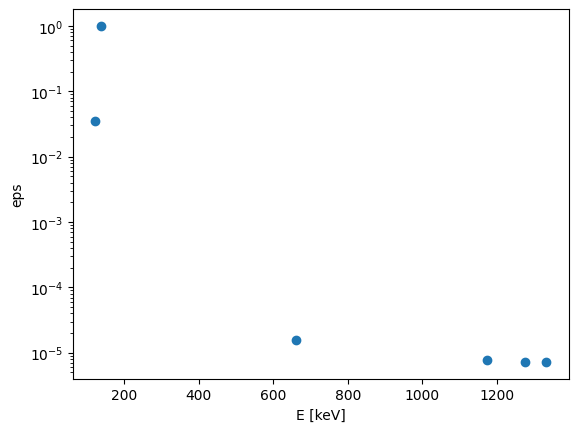

In [ ]:
eps_norm = np.array([eps_57Co, eps_57Co2, eps_137Cs2, eps_60Co, eps_22Na2, eps_60Co2] / eps_57Co2)
E2 = np.array([122.1, 136.5, 661.7, 1173.2, 1274.5, 1332.5])
print(eps_norm)

fig, ax = plt.subplots()

ax.set_xlabel(f'E [keV]')
ax.set_ylabel(f'eps')

ax.semilogy(E2, eps_norm, 'o')

c)

In [ ]:
#122.1 keV
sigma_eps_norm_57Co = eps_norm[0] * np.sqrt((sigma_I_57Co/I_57Co)**2 + (0.17/b[0])**2 + (sigma_eps_57Co/eps_57Co2)**2)

#136.5 keV
sigma_eps_norm_57Co2 = eps_norm[1] * np.sqrt((sigma_I_57Co2/I_57Co2)**2 + (0.08/b[1])**2 + (sigma_eps_57Co2/eps_57Co2)**2)

#661.7 keV
sigma_eps_norm_137Cs2 = eps_norm[2] * np.sqrt((sigma_I_137Cs2/I_137Cs2)**2 + (0.2/b[2])**2 + (sigma_eps_57Co/eps_57Co2)**2)

#1173.2 keV
sigma_eps_norm_60Co = eps_norm[3] * np.sqrt((sigma_I_60Co/I_60Co)**2 + (0.022/b[3])**2 + (sigma_eps_57Co/eps_57Co2)**2)

#1274.5 keV
sigma_eps_norm_22Na2 = eps_norm[4] * np.sqrt((sigma_I_22Na2/I_22Na2)**2 + (0.015/b[4])**2 + (sigma_eps_57Co/eps_57Co2)**2)

#1332.5 keV
sigma_eps_norm_60Co2 = eps_norm[5] * np.sqrt((sigma_I_60Co2/I_60Co2)**2 + (0.006/b[5])**2 + (sigma_eps_57Co/eps_57Co2)**2)

print(f'sigma_eps_norm_122.1 = {sigma_eps_norm_57Co}')
print(f'sigma_eps_norm_136.5 = {sigma_eps_norm_57Co2}')
print(f'sigma_eps_norm_661.7 = {sigma_eps_norm_137Cs2}')
print(f'sigma_eps_norm_1173.2 = {sigma_eps_norm_60Co}')
print(f'sigma_eps_norm_1274.5 = {sigma_eps_norm_22Na2}')
print(f'sigma_eps_norm_1332.5 = {sigma_eps_norm_60Co2}')

# 2.346955844940108e-06

sigma_eps_norm_122.1 = 0.017810574712200662
sigma_eps_norm_136.5 = 0.8575023771204825
sigma_eps_norm_661.7 = 6.001878759205415e-06
sigma_eps_norm_1173.2 = 2.581643901911087e-06
sigma_eps_norm_1274.5 = 2.355182991305311e-06
sigma_eps_norm_1332.5 = 2.346955844940108e-06
